# Tugas Kecil 1 - IF3270 Pembelajaran Mesin

Anggota Kelompok :
1. Daffa Pratama Putra / 13518033
2. Muchammad Ibnu Sidqi / 13518072

# Dataset Breast Cancer

---
## Setup Library dan Dataset

In [41]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

data = load_breast_cancer(as_frame = True)
full_data_X, full_data_Y = load_breast_cancer(return_X_y = True, as_frame=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

X_train_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
506,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,0.06894,...,13.16,24.17,85.13,515.3,0.14020,0.23150,0.35350,0.08088,0.2709,0.08839
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
223,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,19.56,30.29,125.90,1088.0,0.15520,0.44800,0.39760,0.14790,0.3993,0.10640
383,12.39,17.48,80.64,462.9,0.10420,0.12970,0.05892,0.02880,0.1779,0.06588,...,14.18,23.13,95.23,600.5,0.14270,0.35930,0.32060,0.09804,0.2819,0.11180
262,17.29,22.13,114.40,947.8,0.08999,0.12730,0.09697,0.07507,0.2108,0.05464,...,20.39,27.24,137.90,1295.0,0.11340,0.28670,0.22980,0.15280,0.3067,0.07484


---
## Preprocessing and Pipelining

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

---
## Create model

In [43]:
import sklearn.linear_model as lm
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn import tree
from id3 import Id3Estimator
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define model
modelDTL = tree.DecisionTreeClassifier(random_state=0)
modelID3 = Id3Estimator()
modelKmeans = KMeans(n_clusters=2, random_state=0)
modelLogistic = LogisticRegression(random_state=0)
modelNeural = MLPClassifier(random_state=1, max_iter=300)
modelSVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelDTL)
                     ])


---
## Fitting and predict

### Decision Tree Learning

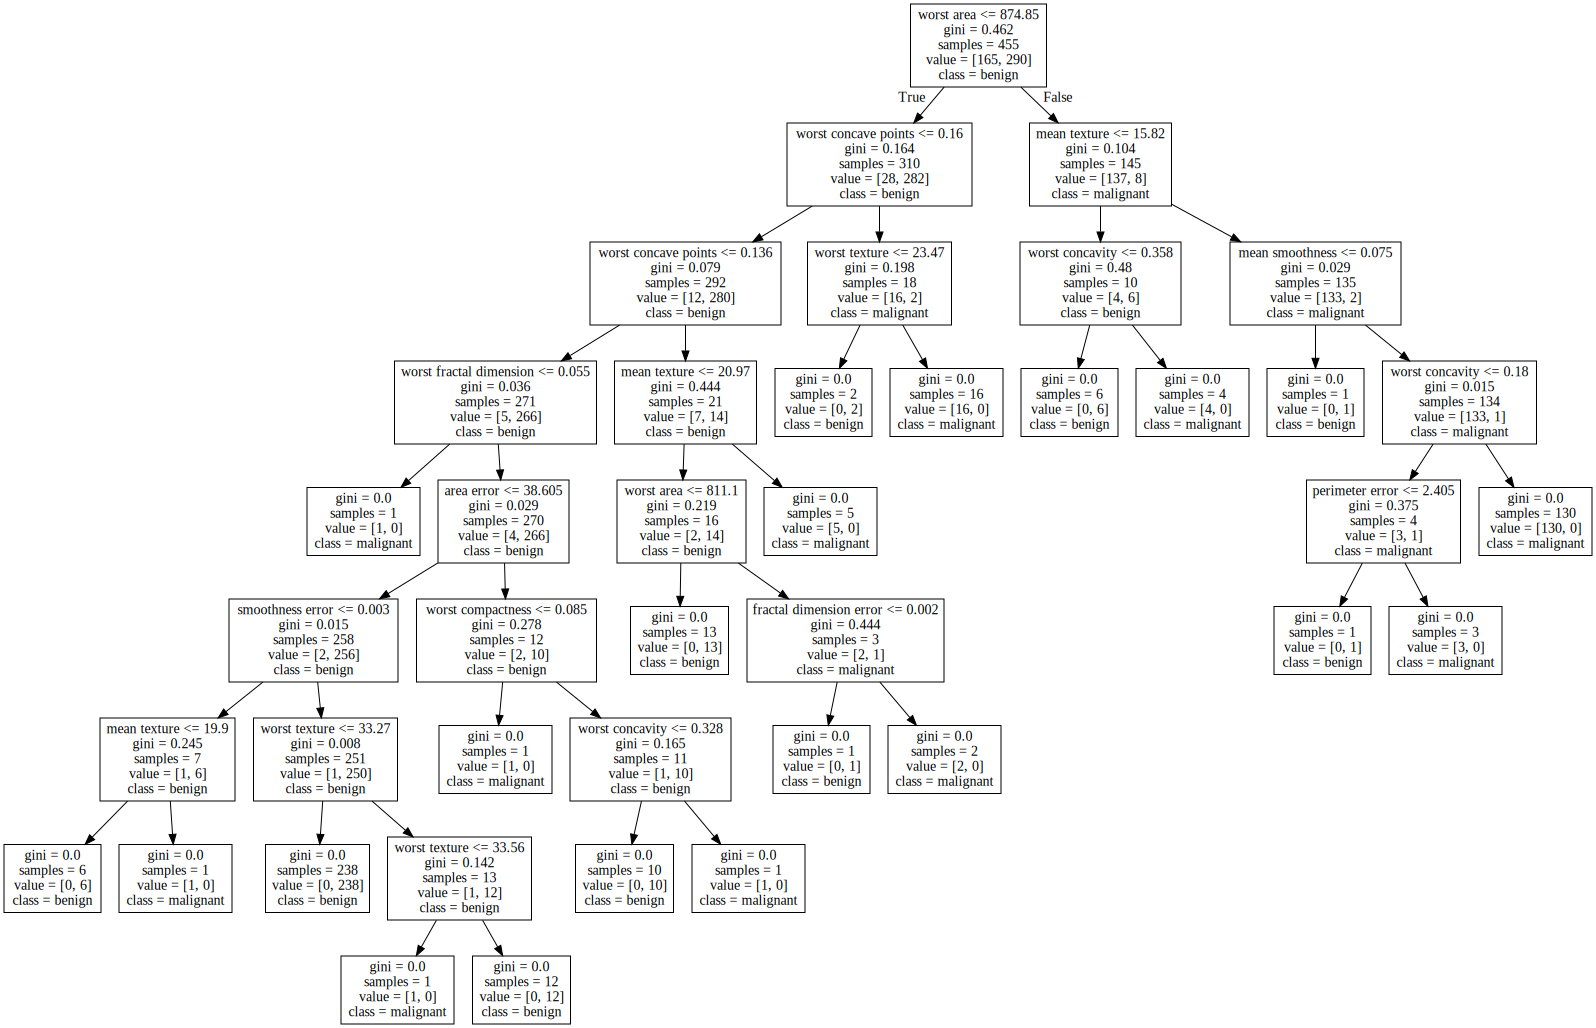

In [44]:
import graphviz
# Preprocessing of training data, fit model 
clf.fit(X_train_full, y_train)
#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_dataDTL = tree.export_graphviz(modelDTL, 
                  feature_names=[d for d in data.feature_names],  
                  class_names= [d for d in data.target_names])
graphDTL = graphviz.Source(dot_dataDTL)

# Preprocessing of validation data, get predictions
predsDTL = clf.predict(X_valid_full)

graphDTL

### ID3 Estimator

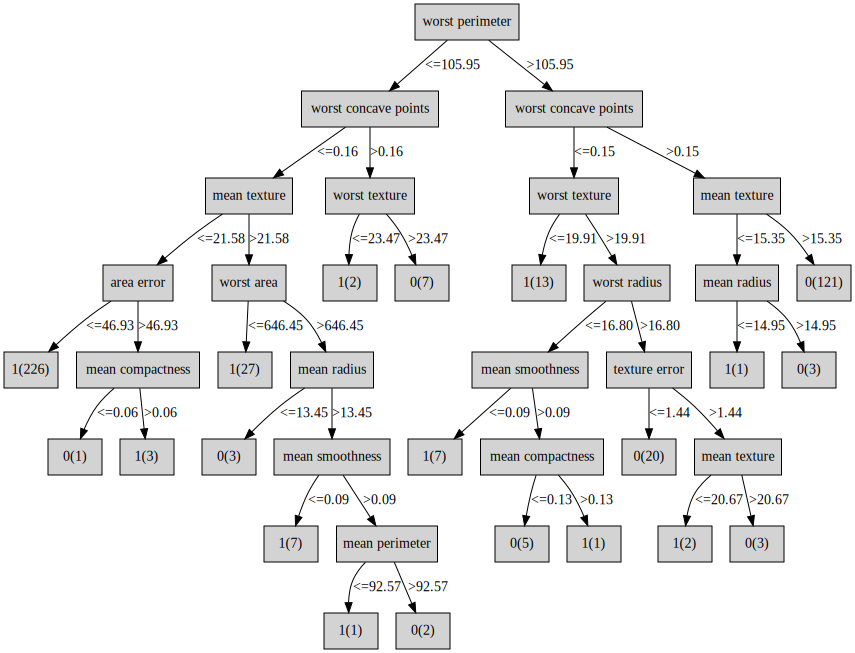

In [45]:
import graphviz
from id3 import export_graphviz

# Preprocessing of training data, fit model 
modelID3.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_treeID3 = export_graphviz(modelID3.tree_, 'graph.dot', 
                  feature_names=[d for d in data.feature_names], 
                  )
with open("graph.dot") as f:
    dot_graphID3 = f.read()
graphID3 = graphviz.Source(dot_graphID3)

# Preprocessing of validation data, get predictions
predsID3 = modelID3.predict(X_valid_full)

graphID3

### KMeans

In [46]:
modelKmeans.fit(X_train_full, y_train)

predsKmeans = modelKmeans.predict(X_valid_full)

### Logistic Regression

In [47]:
modelLogistic.fit(X_train_full, y_train)

predsLogistic = modelLogistic.predict(X_valid_full)

### Neural Network

In [48]:
modelNeural.fit(X_train_full, y_train)

predsNeural = modelNeural.predict(X_valid_full)

### SVM

In [49]:
modelSVM.fit(X_train_full, y_train)

predsSVM = modelSVM.predict(X_valid_full)

### Accuracy and F1 Score

In [50]:
from sklearn.metrics import accuracy_score, f1_score

# Decision Tree Learning
accuracyDTL = accuracy_score(y_valid, predsDTL)
f1DTL = f1_score(y_valid, predsDTL)

# ID3 Estimator
accuracyID3 = accuracy_score(y_valid, predsID3)
f1ID3 = f1_score(y_valid, predsID3)

# KMeans
accuracyKmeans = accuracy_score(y_valid, predsKmeans)
f1Kmeans = f1_score(y_valid, predsKmeans)

# Logistic Regression
accuracyLogistic = accuracy_score(y_valid, predsLogistic)
f1Logistic = f1_score(y_valid, predsLogistic)

# Neural Network
accuracyNeural = accuracy_score(y_valid, predsNeural)
f1Neural = f1_score(y_valid, predsNeural)

# SVM
accuracySVM = accuracy_score(y_valid, predsSVM)
f1SVM = f1_score(y_valid, predsSVM)

# All Model
accuracyAll = [accuracyDTL, accuracyID3, accuracyKmeans, accuracyLogistic, accuracyNeural, accuracySVM]
f1All = [f1DTL, f1ID3, f1Kmeans, f1Logistic, f1Neural, f1SVM]
score_dataAll = {'accuracy': accuracyAll, 'f1': f1All}
allScore = pd.DataFrame(data = score_dataAll, index=['Decision Tree', 'ID3', 'KMeans', 'Logistic', 'Neural Network', 'SVM'])
allScore

,accuracy,f1
Decision Tree,0.938596,0.948905
ID3,0.938596,0.948148
KMeans,0.833333,0.875817
Logistic,0.964912,0.970149
Neural Network,0.947368,0.955224
SVM,0.982456,0.985294


---
# Dataset Play Tennis

---
## Setup Library dan Dataset

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

full_data_X = pd.read_csv('PlayTennis.csv')
full_data_X.dropna(axis=0, subset=['Play Tennis'], inplace=True)
full_data_Y = full_data_X['Play Tennis']
full_data_X.drop(['Play Tennis'], axis=1, inplace=True)
X_train_full, X_valid_full, y_train, y_valid = train_test_split(full_data_X, full_data_Y, 
                                                                train_size=0.8, test_size=0.2)

# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

full_data_X.head()

,Outlook,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Overcast,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cool,Normal,Weak


---
## Preprocessing and Pipelining

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer()

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

---
## Create model

In [53]:
from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Define model
modelDtl = tree.DecisionTreeClassifier(random_state=0)
modelID3 = Id3Estimator()
kmeans = KMeans(n_clusters=2, random_state=0)
modelLogistic = LogisticRegression(random_state=0, max_iter=100)
modelNeural = MLPClassifier(random_state=0, max_iter=300)
modelSVM = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0))

# Bundle preprocessing and modeling code in a pipeline
dtl = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelDtl)
                     ])

modID3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelID3)
                     ])

modelKmeans = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', kmeans)
                     ])

modlogistic = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelLogistic)
                     ])

modNeural = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelNeural)
                     ])

modSVM = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', modelSVM)
                     ])

---
## Fitting and predict

### Decision Tree Learning

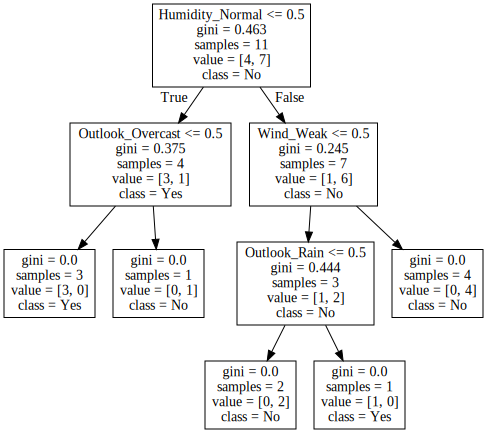

In [54]:
import graphviz
# Preprocessing of training data, fit model 
dtl.fit(X_train_full, y_train)
#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_data = tree.export_graphviz(modelDtl, 
                  feature_names=dtl.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(X_train_full.columns),
                  class_names = ['Yes', 'No'])
graph = graphviz.Source(dot_data)

# Preprocessing of validation data, get predictions
predsDtl = dtl.predict(X_valid_full)
graph

### ID3 Estimator

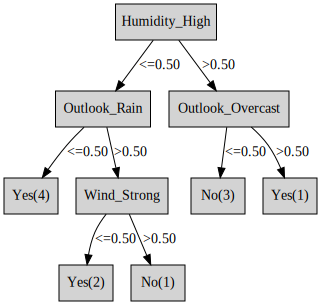

In [55]:
from id3 import export_graphviz

# Preprocessing of training data, fit model 
modID3.fit(X_train_full, y_train)

#r = tree.export_text(model, feature_names = [d for d in data.feature_names])
dot_treeID3 = export_graphviz(modelID3.tree_, 'graph.dot', 
                  feature_names=dtl.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(X_train_full.columns), 
                  )
with open("graph.dot") as f:
    dot_graphID3 = f.read()
graphID3 = graphviz.Source(dot_graphID3)

# Preprocessing of validation data, get predictions
predsID3 = modID3.predict(X_valid_full)

graphID3

### KMeans

In [56]:
modelKmeans.fit(X_train_full, y_train)

predsKmeans = ['Yes' if item==1 else 'No' for item in modelKmeans.predict(X_valid_full)]
predsKmeans

['Yes', 'Yes', 'No']

### Logistic Regression

In [57]:
modlogistic.fit(X_train_full, y_train)

predsLogistic = modlogistic.predict(X_valid_full)
predsLogistic

array(['Yes', 'Yes', 'Yes'], dtype=object)

### Neural Network

In [58]:
modNeural.fit(X_train_full, y_train)
predsNeural = modNeural.predict(X_valid_full)
predsNeural

array(['Yes', 'Yes', 'Yes'], dtype='<U3')

### SVM

In [59]:
modSVM.fit(X_train_full, y_train)
predsSVM = modSVM.predict(X_valid_full)
predsSVM

array(['Yes', 'Yes', 'Yes'], dtype=object)

---
## Accuracy and F1 Score

In [60]:
from sklearn.metrics import accuracy_score, f1_score

accuracy = [accuracy_score(y_valid, predsDtl),accuracy_score(y_valid, predsID3),accuracy_score(y_valid, predsKmeans),accuracy_score(y_valid, predsLogistic),accuracy_score(y_valid, predsNeural),accuracy_score(y_valid, predsSVM)]
f1 = [f1_score(y_valid, predsDtl, pos_label='Yes'), f1_score(y_valid, predsID3, pos_label='Yes'), f1_score(y_valid, predsKmeans, pos_label='Yes'), f1_score(y_valid, predsLogistic, pos_label='Yes'), f1_score(y_valid, predsNeural, pos_label='Yes'), f1_score(y_valid, predsSVM, pos_label='Yes')]
score_data = {'accuracy': accuracy, 'f1': f1}
score = pd.DataFrame(data = score_data, index=['Decision Tree Learning', 'ID3 Estimator', 'K-Means', 'Logistic Regression', 'Neural Network', 'SVM'])
score

,accuracy,f1
Decision Tree Learning,0.666667,0.666667
ID3 Estimator,0.666667,0.666667
K-Means,1.000000,1.000000
Logistic Regression,0.666667,0.800000
Neural Network,0.666667,0.800000
SVM,0.666667,0.800000


---
## Kesimpulan
Pada tugas ini, kami menggunakan dua dataset, yakni dataset Breast Cancer dan dataset Play Tennis. Hasil dari penerapan model algoritma yang digunakan pada kedua dataset tersebut bisa dilihat pada output di atas. Dari beberapa model yang sudah diuji coba, dapat terlihat bahwa model SVM memiliki skor akurasi serta f1 paling tinggi dibanding model lainnya. Hal ini disebabkan oleh perhitungan SVM yang meninjau vektor dari masing masing atribut. Terlihat juga bahwa algoritma yang paling buruk dan tidak menentu adalah algoritma K-Means. Alasannya adalah karena dataset yang digunakan merupakan dataset untuk klasifikasi, sehingga algoritma yang harus digunakan adalah algoritma supervised learning, sedangkan K-Means merupakan algoritma clustering yang digunakan untuk permalasahan unsupervised Learning. Selain itu, nilai accuracy dan f1 dari model algoritma Logistic Regression dan Neural Network sering mengalami kendala epoch yang dilakukan tidak mengalami kondisi konvergen sehingga nilai akurasi dan f1 tidak menentu. Nilai algoritma Decision Tree Learning dan ID3 Estimator memiliki nilai yang relatif stabil karena dataset yang digunakan merupakan dataset yang memiliki nilai atribut target yang diskrit.   